## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase. 
<pre>  
<center><img src="../images/SVM_1.png" height = 700 width = 800></center>
</pre>

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.
<pre>  
<center><img src="../images/SVM_2.png" height = 700 width = 800></center>
</pre>

A diferencia de los modelos anteriores (KNN y LDA) la SVM no devuelve probabilidades de pertenencia a las clases.

Es un modelo muy sensible a la diferencia de escalas de los atributos

## 📁
A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta data

In [9]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from funciones_auxiliares import plot_decision_regions

### Dataset Nº 1

Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases. Parte de este ejercicio es probar con diferentes valores del parámetro C y ver qué efecto tiene la presencia del outlier en la región de separación. 

In [12]:
import scipy.io as sio
arch_mat = sio.loadmat('../data/data1.mat')
#arch_mat
X = arch_mat['X']
y = arch_mat['y'].flatten()
y.shape

(51,)

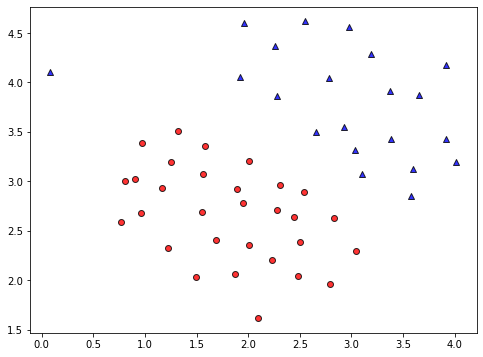

In [19]:
markers = ('o', '^')
colors = ('red', 'blue')
plt.figure(figsize=(8,6))

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(
                x = X[ y==cl, 0],
                y = X[ y==cl, 1],
                alpha = 0.8,
                c= colors[idx],
                marker=markers[idx],
                label = cl,
                edgecolor= 'black'
               )
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
x_std = sc.transform(X)

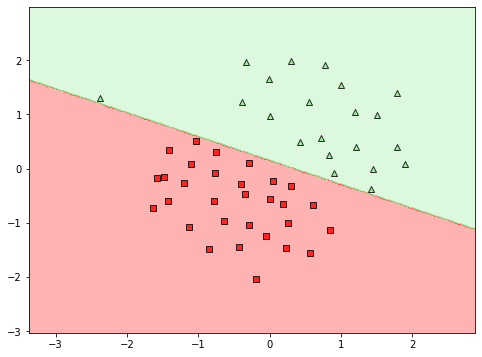

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel ='linear', C=100, random_state=1)
svm.fit(x_std, y)

plt.figure(figsize=(8,6))
plot_decision_regions(x_std, y, clasificador=svm)

### Dataset Nº 2
### SVM con kernel Gaussiano

In [26]:
arch_mat_2 = sio.loadmat('../data/data2.mat')
#arch_mat
X_2 = arch_mat_2['X']
y_2 = arch_mat_2['y'].flatten()
X_2.shape

(863, 2)

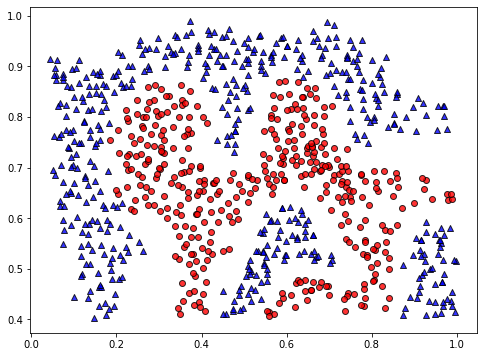

In [28]:
markers = ('o', '^')
colors = ('red', 'blue')
plt.figure(figsize=(8,6))

for idx, cl in enumerate(np.unique(y_2)):
    plt.scatter(
                x = X_2[ y_2==cl, 0],
                y = X_2[ y_2==cl, 1],
                alpha = 0.8,
                c= colors[idx],
                marker=markers[idx],
                label = cl,
                edgecolor= 'black'
               )
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_2)
x_std_2 = sc.transform(X_2)

Como verá de la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__

(-2.0, 2.0)

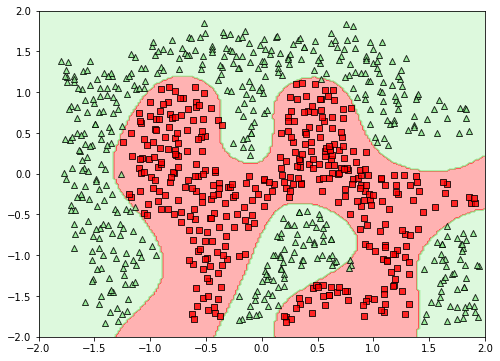

In [34]:
svm_2 = SVC(kernel='rbf', C=50, gamma=1, random_state=1)
svm_2.fit(x_std_2, y_2)

plt.figure(figsize=(8,6))
plot_decision_regions(x_std_2, y_2, clasificador=svm_2)

plt.xlim(-2,2)
plt.ylim(-2,2)

El parámetro gamma de la función, es un parámetro que indica cuánta influencia tiene una sola muestra, haciendo que el límite de decisión se ajuste mucho más a las muestras.

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables 

### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos para validación (_X_val_, _y_val_)

In [35]:
arch_mat_3 = sio.loadmat('../data/data3.mat')
#arch_mat_3
X_3 = arch_mat_3['X']
y_3 = arch_mat_3['y'].flatten()
X_val_3 = arch_mat_3['Xval']
y_val_3 = arch_mat_3['yval'].flatten()
print(X_3.shape)
print(X_val_3.shape)

(211, 2)
(200, 2)


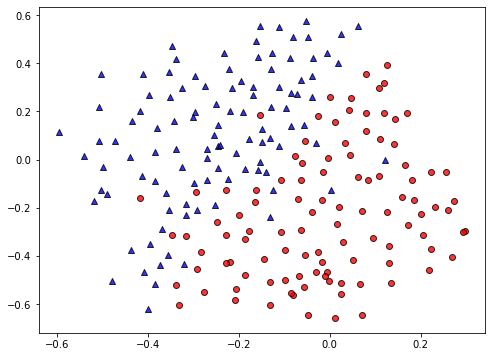

In [36]:
markers = ('o', '^')
colors = ('red', 'blue')
plt.figure(figsize=(8,6))

for idx, cl in enumerate(np.unique(y_3)):
    plt.scatter(
                x = X_3[ y_3==cl, 0],
                y = X_3[ y_3==cl, 1],
                alpha = 0.8,
                c= colors[idx],
                marker=markers[idx],
                label = cl,
                edgecolor= 'black'
               )
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_3)
x_std_3 = sc.transform(X_3)
x_val_3_std = sc.transform(X_val_3)

In [49]:
from sklearn.model_selection import cross_val_score

valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

scores = {}

for c in valores_C:
    for g in valores_gamma:
        svm_3 = SVC(kernel='rbf', C=c, gamma=g, random_state=1)
        svm_3.fit(x_std_3 , y_3)
        scores[(c,g)] = svm_3.score(X_val_3, y_val_3)
        
#scores 
print(max( scores.keys(), key= (lambda key: scores[key]) ))

(10, 0.03)


### Búsqueda en cuadrícula (Grid search)

In [43]:
from sklearn.model_selection import GridSearchCV

grilla = [
    {'C':[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
]

svm_gd = SVC(kernel='rbf', random_state=1)

grid_search = GridSearchCV(svm_gd, grilla, cv=5, scoring='accuracy', return_train_score= True)

grid_search.fit(x_std_3, y_3)

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid=[{'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}],
             return_train_score=True, scoring='accuracy')

In [44]:
grid_search.best_params_

{'C': 10, 'gamma': 1}

In [54]:
svm_3 = SVC(kernel='rbf', C=10, gamma=1, random_state=1)
svm_3.fit(x_std_3 , y_3)
print(svm_3.score(x_val_3_std, y_val_3))

0.95


(-2.0, 2.0)

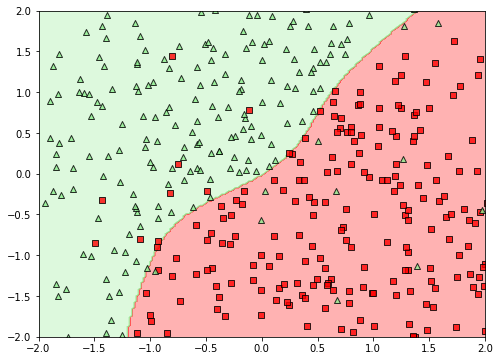

In [55]:
X_comb = np.vstack( (x_std_3, x_val_3_std) )
y_comb = np.hstack( (y_3, y_val_3) ) 

plt.figure(figsize=(8,6))
plot_decision_regions(X_comb, y_comb, clasificador=svm_3)

plt.xlim(-2,2)
plt.ylim(-2,2)